In [41]:
from sklearn import datasets, model_selection, linear_model, metrics
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X,y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [78]:
print(f"correlations with target:\n{np.array([np.corrcoef(X[:,i].squeeze(),y)[0,1] for i in range(X.shape[1])])}")

correlation with target:
[ 0.18788875  0.043062    0.58645013  0.44148385  0.21202248  0.17405359
 -0.39478925  0.43045288  0.56588343  0.38248348]


In [19]:
print(datasets.load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

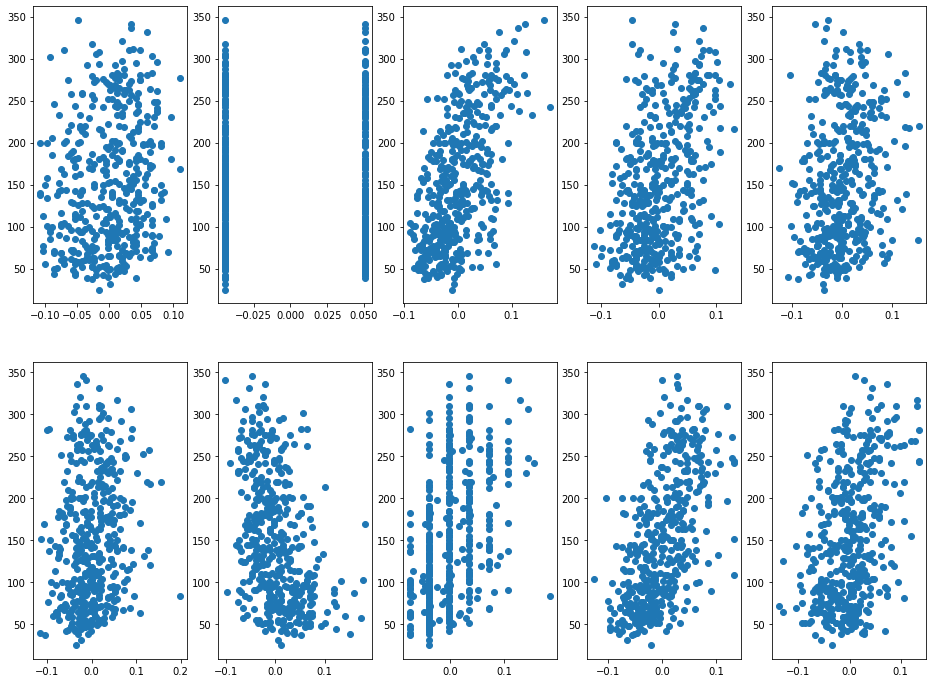

In [28]:
plt.figure(figsize=(16,12))
for i in range(X.shape[1]):
  plt.subplot(2,5,i+1)
  plt.scatter(X[:,i], y)
_ = plt.show()

In [46]:
def get_data(col_idx = 2):
  X_ = X[:,np.newaxis,2]
  return model_selection.train_test_split(X_, y, test_size = 0.3)

def get_model(model, X, y):
  model.fit(X,y)
  plt.scatter(X,y)
  plt.plot(np.array([[X.min()], [X.max()]]),model.predict(np.array([[X.min()], [X.max()]])))
  _ = plt.show()
  return model

In [47]:
model = linear_model.LinearRegression()

Relation BMI vs Diabetes progression


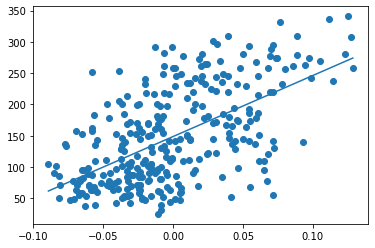

R2: 0.31499991832132246
SD:63.16339534931523
RMSE:64.1745877514872


In [112]:
X_train, X_test, y_train, y_test = get_data()
print("Relation BMI vs Diabetes progression")
model = get_model(model, X_train, y_train)
print(f'R2: {model.score(X_test, y_test)}')
print(f"SD:{np.std(y_test.squeeze()-model.predict(X_test))}")
print(f"RMSE:{np.sqrt( np.mean( (y_test.squeeze()-model.predict(X_test))**2 ))}")

Relation Average Blood Pressure vs Diabetes progression


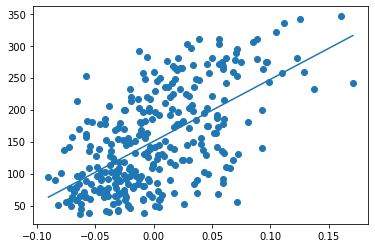

R2: 0.28155966996565984
SD:66.60283175355306
RMSE:66.79487486547126


In [113]:
X_train, X_test, y_train, y_test = get_data(3)
print("Relation Average Blood Pressure vs Diabetes progression")
model = get_model(model, X_train, y_train)
print(f"R2: {model.score(X_test, y_test)}")
print(f"SD:{np.std(y_test.squeeze()-model.predict(X_test))}")
print(f"RMSE:{np.sqrt( np.mean( (y_test.squeeze()-model.predict(X_test))**2 ))}")

Relation S5 vs Diabetes progression


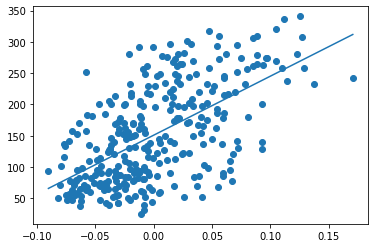

R2: 0.30790599578578626
SD:62.727433564931786
RMSE:62.85561724830902


In [116]:
X_train, X_test, y_train, y_test = get_data(8)
print("Relation S5 vs Diabetes progression")
model = get_model(model, X_train, y_train)
print(f"R2: {model.score(X_test, y_test)}")
print(f"SD:{np.std(y_test.squeeze()-model.predict(X_test))}")
print(f"RMSE:{np.sqrt( np.mean( (y_test.squeeze()-model.predict(X_test))**2 ))}")

The feature S5 explains 37% of the variation on the diabetes progression and the dispersion lies in the middle of the others two variables. This feature could be a good predictor for diabetes progression. This is supported by correlation which is one of the greatest.